In [2]:
from benchmarking import benchmark_function
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
def func(N, pow):
    import time
    time.sleep(float(pow)/10000 * N)
    return np.arange(N)**pow

param_grid = [
    [10, 100, 1000],
    [2, 3, 4],
]
param_names = ['N', 'powers']

df = benchmark_function(param_grid, func, param_names, n_times=10)

100%|██████████| 9/9 [00:10<00:00,  1.11s/it]


/home/sandro/anaconda2/envs/sandbox_36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


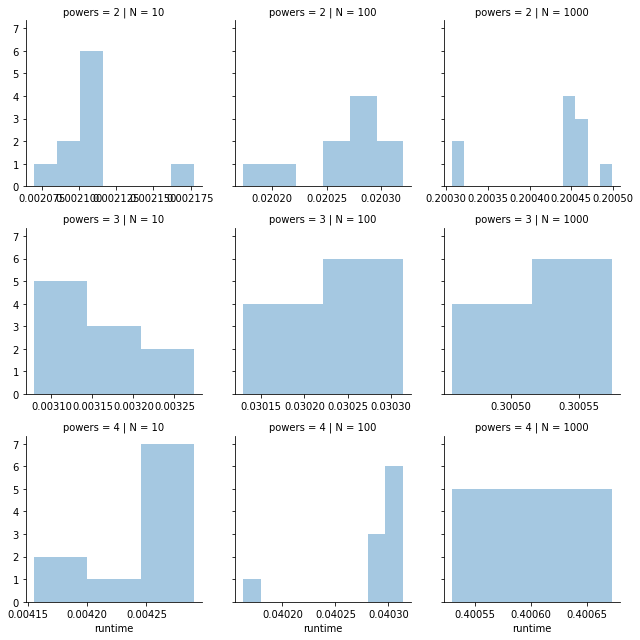

In [4]:
g = sns.FacetGrid(df, col='N', row='powers', sharex=False)
g = g.map(sns.distplot, 'runtime', hist=True, kde=False)

In [5]:
df2 = df.groupby(['N', 'powers']).mean().reset_index().drop('num_execution', 1)

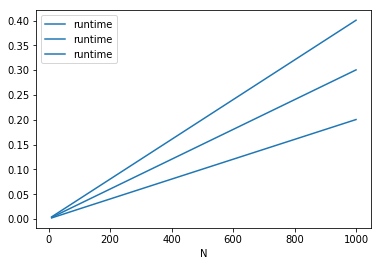

In [6]:
from pylab import *
fig, ax = plt.subplots()
df2.groupby('powers').plot(x='N', y='runtime', subplots=True, ax=ax, legend=True)
ax.legend()

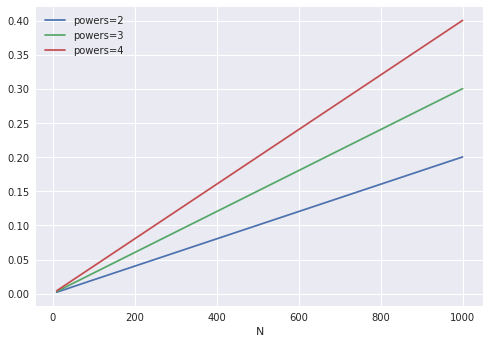

In [7]:
x='N'
y='runtime'
from itertools import *
compare_params=['powers']

def roundrobin(*iterables):
    "roundrobin('ABC', 'D', 'EF') --> A D E B F C"
    # Recipe credited to George Sakkis
    num_active = len(iterables)
    nexts = cycle(iter(it).__next__ for it in iterables)
    while num_active:
        try:
            for next in nexts:
                yield next()
        except StopIteration:
            # Remove the iterator we just exhausted from the cycle.
            num_active -= 1
            nexts = cycle(islice(nexts, num_active))

with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    df2 = df[compare_params+[x, y]]
    for name, group in df2.groupby(compare_params):
        datum = group.reset_index().groupby(x).mean().reset_index().drop('index', axis=1)
        label_template = '{}={}' * len(compare_params)
        if not hasattr(name, '__iter__'): #check if list
            name = [name]
        label_vals = list(roundrobin(compare_params, name))
        label = label_template.format(*label_vals)
        datum.plot(x, y, ax=ax, label=label)
    